# Playground
This file is not part of the model. It is mainly used to look at the data, niche distributions, plotting, testing functions, debugging etc.

In [3]:
import scanpy as sc
from pathlib import Path
import sys

file_path = Path("data/adata_test_uncompressed.h5ad")
adata = sc.read(file_path)
print(adata)
print(adata.obs['sample'].unique())
print(adata.obs['Niche_NMF'].unique)
print(sys.getsizeof(adata))

AnnData object with n_obs × n_vars = 45273 × 1500
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', 'patient', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS', 'Androgen', 'EGFRsignaling', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'mean_nUMI_fac

In [8]:
import numpy as np

# 4 healthy, 3 IPF, 4 randoms
sample_names = ['90_A1_H237762_IPF_processed_CM', '90_C1_RO-730_Healthy_processed_CM', '91_A1_RO-727_Healthy_processed_CM', '91_B1_RO-728_Healthy_processed_CM', '91_D1_24513-17_IPF_processed_CM', '92_D1_RO-3736_IPF_processed_CM', '92_A1_RO-3203_Healthy_processed_CM', '1217_0001_processed_aligned', '1217_0002_processed_aligned', '1217_0003_processed_aligned', '1217_0004_processed_aligned']
sample_counts = [len(adata.obs[adata.obs['sample'] == s]) for s in sample_names]
total_counts = np.sum(sample_counts)
sample_counts_norm = sample_counts/total_counts

print(sample_counts)
print(sample_counts_norm)
print(total_counts)

NameError: name 'adata' is not defined

In [7]:
# check out class distribution

from collections import Counter
from dataset import get_data

file_path = Path("data/adata_trainval_uncompressed.h5ad")
features, labels, _ = get_data(file_path)
unique_labels, counts = np.unique(labels, return_counts=True)
label_counts = Counter(labels)
print("Class Distribution:")
for label, count in zip(unique_labels, counts):
  print(f"Class {label}: {count}")


Class Distribution:
Class 0: 2876
Class 1: 21128
Class 2: 5328
Class 3: 2440
Class 4: 5100
Class 5: 728
Class 6: 908
Class 7: 6765


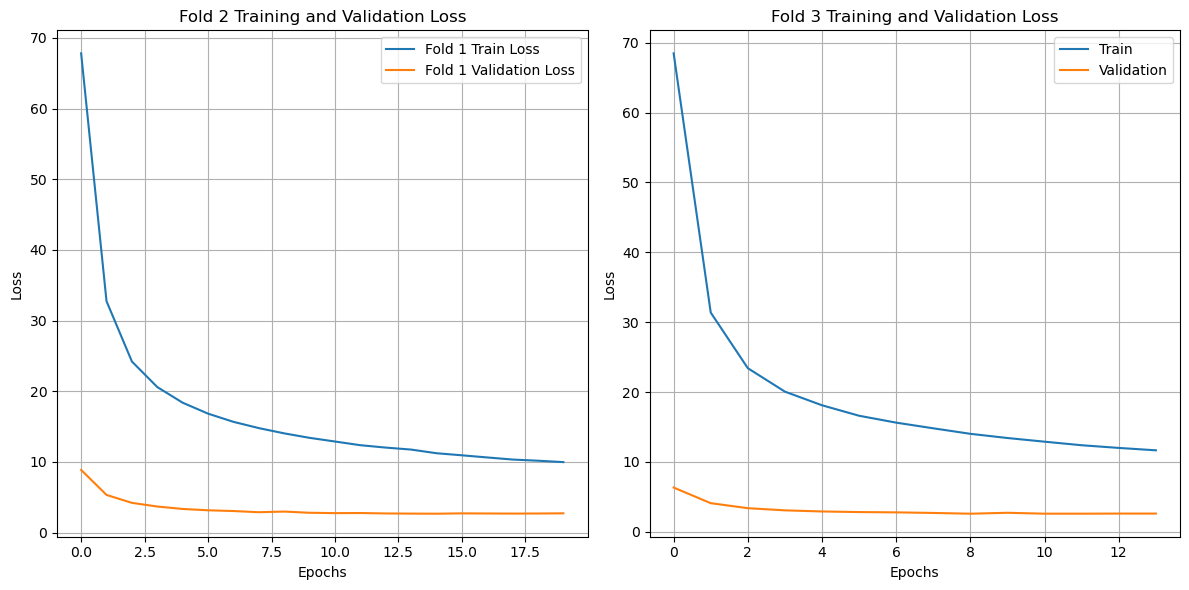

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for folds 1 and 4
data = """0,0,65.79611,10.32349,0.76116
0,1,28.91237,7.37681,0.82764
0,2,21.30086,6.04217,0.87056
0,3,18.12443,5.55817,0.87793
0,4,16.14778,5.45695,0.87876
0,5,14.74162,5.50426,0.87843
0,6,13.74155,5.98292,0.86698
0,7,12.93208,5.66281,0.87528
0,8,12.17464,5.70044,0.87396
0,9,11.69149,6.64563,0.85949
1,0,66.29343,10.42141,0.78979
1,1,30.63764,7.15592,0.86249
1,2,22.38755,5.99651,0.88212
1,3,18.82334,5.38990,0.88998
1,4,16.74136,5.09644,0.89105
1,5,15.35876,4.91808,0.89373
1,6,14.33338,4.78935,0.89746
1,7,13.50258,4.74297,0.89630
1,8,12.80183,4.70149,0.89792
1,9,12.21961,4.64438,0.89996
1,10,11.73568,4.60186,0.90050
1,11,11.34330,4.61257,0.90029
1,12,10.85275,4.63185,0.89980
1,13,10.50088,4.62741,0.89965
1,14,10.19837,4.66511,0.89997
1,15,9.83419,4.66764,0.89952
2,0,67.80476,8.86637,0.82352
2,1,32.73511,5.33097,0.89483
2,2,24.20635,4.20827,0.91017
2,3,20.58972,3.68804,0.91554
2,4,18.37763,3.34420,0.92891
2,5,16.83089,3.15626,0.93274
2,6,15.66928,3.05048,0.93193
2,7,14.78390,2.88351,0.93312
2,8,14.03914,2.97616,0.93519
2,9,13.40559,2.80489,0.93932
2,10,12.88675,2.75377,0.94001
2,11,12.36499,2.76890,0.93988
2,12,12.02745,2.70814,0.94135
2,13,11.74662,2.68743,0.94071
2,14,11.22880,2.67303,0.94143
2,15,10.93612,2.72053,0.93634
2,16,10.63155,2.70409,0.94097
2,17,10.33512,2.69016,0.94010
2,18,10.17021,2.70098,0.94054
2,19,9.97121,2.72725,0.94032
3,0,68.47622,6.33145,0.88407
3,1,31.37572,4.09317,0.90729
3,2,23.41306,3.37702,0.92957
3,3,20.05685,3.06764,0.93090
3,4,18.10630,2.90790,0.93434
3,5,16.60619,2.82144,0.93663
3,6,15.61997,2.77912,0.93447
3,7,14.80875,2.69521,0.93663
3,8,14.01939,2.58735,0.94008
3,9,13.41963,2.71775,0.93613
3,10,12.89415,2.59181,0.93904
3,11,12.38534,2.59028,0.93955
3,12,12.00256,2.60663,0.93931
3,13,11.65935,2.60595,0.93821
4,0,62.89673,18.50410,0.65545
4,1,30.49381,12.59066,0.70178
4,2,21.81525,9.53334,0.80624
4,3,17.91135,8.51686,0.80922
4,4,15.72851,7.86823,0.82229
4,5,14.26687,7.67861,0.82351
4,6,13.16582,7.12119,0.83846
4,7,12.25961,6.88736,0.84575
4,8,11.64395,6.88066,0.83987
4,9,11.00946,6.86345,0.84022
4,10,10.44917,6.66359,0.84874
4,11,10.00447,6.65464,0.84949
4,12,9.60720,6.57580,0.84932
4,13,9.28123,6.55386,0.84790
4,14,8.89909,6.91990,0.84011
4,15,8.61902,6.68823,0.84722
4,16,8.29857,6.69826,0.85003
4,17,8.02111,6.76646,0.84557
4,18,7.75913,6.90457,0.84402
0,0,0.00000,4.37461,0.00000"""


# Parse the data for folds 1 and 4
lines = data.strip().split('\n')
fold_1_epochs = []
fold_1_train_losses = []
fold_1_val_losses = []
fold_4_epochs = []
fold_4_train_losses = []
fold_4_val_losses = []

for line in lines:
    kfold, epoch, train_loss, val_loss, _ = map(float, line.split(','))
    if kfold == 2:
        fold_1_epochs.append(epoch)
        fold_1_train_losses.append(train_loss)
        fold_1_val_losses.append(val_loss)
    elif kfold == 3:
        fold_4_epochs.append(epoch)
        fold_4_train_losses.append(train_loss)
        fold_4_val_losses.append(val_loss)

# Convert lists to numpy arrays
fold_1_epochs = np.array(fold_1_epochs)
fold_1_train_losses = np.array(fold_1_train_losses)
fold_1_val_losses = np.array(fold_1_val_losses)
fold_4_epochs = np.array(fold_4_epochs)
fold_4_train_losses = np.array(fold_4_train_losses)
fold_4_val_losses = np.array(fold_4_val_losses)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fold_1_epochs, fold_1_train_losses, label='Fold 1 Train Loss')
plt.plot(fold_1_epochs, fold_1_val_losses, label='Fold 1 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Fold 2 Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(fold_4_epochs, fold_4_train_losses, label='Train')
plt.plot(fold_4_epochs, fold_4_val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Fold 3 Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
